So far, we've mainly focused on normal distributions in descriptive statistics. Out there in the real world though, there are many processes involving non-normal distributions. In this checkpoint, we'll explore the central limit theorem, which shows that normal distributions can still be used to analyze samples of data from non-normally distributed populations.

When sampling from a population (of any distribution), as the sample size gets larger the sample means tend to follow a normal probability distribution, clustering around the true population mean. The more non-normal the population the larger the samples need to be, but ultimately this means that statistics can be calculated, and population parameters estimated, even when the distribution of a population is unknown.

Given that statistics are generally used to discover information about populations, data scientists need to be able to start doing statistics on a population without knowing much about it. The central limit theorem demonstrates that this is possible, and by doing so, unlocks the door to all the statistics we have discussed so far (mean, median, variance, standard deviation, standard error) and many of the statistics we will be discussing from this point forward.

Here are the topics we'll cover:

* Comparing groups in a sample
* sample means
* t-values


This checkpoint ends with an assignment where you'll practice working with the central limit theorem.

## Comparing Groups in a Sample: The Central Limit Theorem in Action

For an example of the central limit theorem in action, we can compare the means of two samples, drawn from two populations.  To compare two means, we want to calculate the mean and standard deviation of each sample.  Then, we subtract one mean from the other, and look at the size of the difference in the context of the combined variance of the two samples.  The larger the difference is relative to the variance, the less likely the difference is to be due to random chance, and the more likely it is to reflect meaningful differences between the two populations.

$$\bar y = \bar x_2- \bar x_1$$

To combine the variances, the squared standard deviations are divided by the sample size and summed, then we take the square root of the sum.  This is the standard error of the difference, representing the variance in the sample differences around the population difference, and you can see the formula written below.

$$se=\sqrt{\frac {s_1^2 } n_1 + \frac {s_2^2 } n_2}$$

The difference divided by the standard error is a ratio called the **t-value**.  T-values put the difference in context by telling us how large the difference is relative to the amount of variance, or noise, in the data.  In very noisy data, small differences are more likely to result from the noise rather than from real differences between the population means.

$$t-value=\frac{\bar y}{se}$$

Given a t-value, we can calculate the probability that a t-value at least this extreme would occur by chance, called a **p-value**.  This tells us how likely it is that we would get the sampling data we observe if the two population means were not, in fact, different from one another.
The p-value runs between 0 (It is impossible to get a difference of this size or greater in the absence of a real population difference) and 1 (we will always get a difference of this size or greater in the absence of a real population difference).  The lower the p-value, the more confidently we can conclude that there is a meaningful difference between the means of the two groups in the population.

Let’s spin up some population data and give this a try. We’ll make two variables to represent two different populations: one a binomially distributed variable with p of 0.2, n=10, and 10000 datapoints (`group1`), and another binomially distributed variable with p of 0.5, n=10, and 10000 datapoints (`group2`). The true population difference between the two populations is 0.3.


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

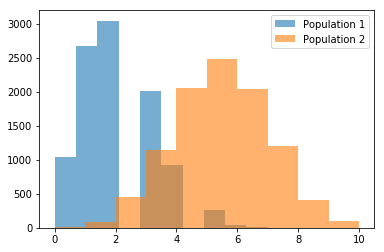

In [2]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.6, label='Population 1') 
plt.hist(pop2, alpha=0.6, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

The populations are not normal. Next, take a sample of 100 from each population and plot them.

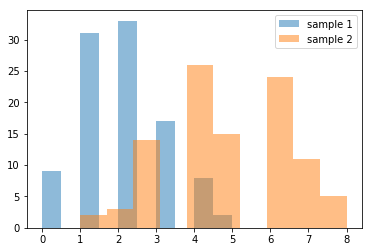

In [3]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

Next, compute the means  and standard deviations for each group.  Note that the mean represents `n * p`: the probability of an event occurring (`p`) multiplied by the number of repetitions (`n`).  To get p for each sample, divide by `n`, which we set to 10 when generating the populations.

In [4]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

1.9
4.9
1.1532562594670794
1.5905973720586868
3.0000000000000004


Next, calculate the standard error of the sampling distribution of the difference of the means.  First, create an array with the size of each variable and another with the standard deviation of each variable.  In this case, the sizes are already known since you provided them earlier, but let’s calculate them anyway.

In [5]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

print('size is {} and sd is {} and diff_se is {}'.format(size, sd, diff_se))

15.269597956778629
size is [100 100] and sd is [1.15325626 1.59059737] and diff_se is 0.19646882704388502


Finally, we import the function `ttest_ind` from scipy.stats, which calculates the t-value for us (called “statistic”) and also provides the probability calculation (called “pvalue”).  The t-value we calculated and the t-value given by the function may differ slightly after the hundredth decimal place.  This is due to differences of rounding caused by our multiple-step approach to calculating the t-value.  

In [6]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=15.193058136663648, pvalue=4.0764582262739825e-34)


The t-value scales the difference between the two groups by the amount of variance in the two samples.  High variability in samples can lead to groups with means that look very different, but when we look at the histogram we see that most of the values in the sample groups overlap.  The groups are so variable that the distribution of values is quite broad.  For example, Olympic races are split into men’s races and women’s races because men are, on average, faster than women.  However, looking at [the distribution of running speed in the New York marathon](http://www.warandgender.com/wggendif.htm), where women and men run together, it’s clear that running speed has a high degree of variability, and that the distributions for men and women overlap a great deal.  

One way to interpret a t-value is as the number of standard errors worth of space separating the group means.  A t-value of 2 would indicate that the means are two standard errors apart.

The p-value associated with a t-test indicates the likelihood of getting a difference this large or larger in the samples if the populations were not different.  The smaller the p-value, the more likely the difference we see in the samples meaningfully reflects the populations.  The p-value in the test you did above is really small, so we can be fairly confident that the difference in means we see is due to a real difference in the population and not due to variability in the samples.

## Assignments

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook above, reproduce the `pop1` and `pop2` populations and samples using numpy's binomial function. Specifically, create two binomially distributed populations with `n` equal to `10` and size equal to `10000`. The p-value of `pop1` should be `0.2` and the p-value of `pop2` should be `0.5`. Using a sample size of `100`, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen.  Discuss the results with your mentor.

 1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each.  Repeat this again, decreasing the size of your samples to 20.  What values change, and what remain the same?

 2. Change the probability value (`p` in the [NumPy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html)) for `pop1` to 0.3, then take new samples and compute the t-statistic and p-value.  Then change the probability value p for group 1 to 0.4, and do it again.  What changes, and why?
 
 3. Change the distribution of your populations from binomial to a distribution of your choice.  Do the sample mean values still accurately represent the population values?

When you've given it a try, you can find a sample solution [here](https://github.com/Thinkful-Ed/data-201-resources/blob/master/solutions/Prep%20course/3.3.7.ipynb).


In [18]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pop1 = np.random.binomial(10, .2, 10000)
pop2 = np.random.binomial(10, .5, 10000)

In [19]:
samp1_frompop1 = np.random.choice(pop1, 100, replace=True)
samp1_frompop2 = np.random.choice(pop2, 100, replace=True)

In [20]:
print('mean for first sample of pop1 is {} and mean for first sample of pop2 is {}'.format(samp1_frompop1.mean(), samp1_frompop2.mean()))
print('standard deviation for first sample of pop1 is {} and standard deviation for first sample of pop2 is {}'.format(samp1_frompop1.std(), samp1_frompop2.std()))

mean for first sample of pop1 is 1.98 and mean for first sample of pop2 is 4.87
standard deviation for first sample of pop1 is 1.2163880959627975 and standard deviation for first sample of pop2 is 1.4673445403176448


__Q. 1.__  
__A:__ the mean should increase by roughly a factor of 10, to aproximately 20 and aprx. 50, since the sample means are computed as odds of positive result * number of draws. The first samples give us a small amount of information about the population means (e.g., the first mean for pop1 was 1.91, which is below 2, so the population mean is _slightly_ more likely than not to be below 2000). The larger sample size makes the mean more likely to be closer to the true mean.    

Standard Deviations should decrease given the larger sample size.  

For the smaller sample, the reverse will be true. 

In [21]:
sampn1000_frpop1 = np.random.choice(pop1, 1000, replace=True)
sampn1000_frpop2 = np.random.choice(pop2, 1000, replace=True)

In [12]:
pop1[0:30]

array([3, 1, 3, 1, 1, 3, 1, 3, 0, 1, 3, 1, 2, 2, 3, 0, 1, 4, 2, 2, 3, 3,
       2, 2, 1, 3, 2, 0, 2, 1])

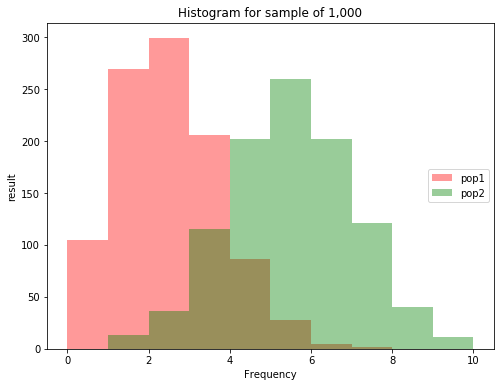

In [50]:
fig = plt.figure(figsize=(8,6))

plt.hist(sampn1000_frpop1, orientation='vertical', color='r', alpha=.4, label="pop1", bins=np.linspace(0, 10, 11))
plt.xlabel('Frequency')
plt.ylabel('result')
plt.title('Histogram for sample of 1,000')

plt.hist(sampn1000_frpop2, orientation='vertical', color='g', alpha=.4, label="pop2", bins=9)
plt.xlabel('Frequency')
plt.ylabel('result')
plt.title('Histogram for sample of 1,000')

plt.legend(loc='right') 

plt.show(fig)

In [9]:
print('mean for second sample of pop1 is {} and mean for first sample of pop2 is {}'.format(sampn1000_frpop1.mean(), sampn1000_frpop2.mean()))
print('standard deviation for second sample of pop1 is {} and standard deviation for second sample of pop2 is {}'.format(sampn1000_frpop1.std(), sampn1000_frpop2.std()))

mean for second sample of pop1 is 2.014 and mean for first sample of pop2 is 5.019
standard deviation for second sample of pop1 is 1.2898852662155653 and standard deviation for second sample of pop2 is 1.609546209339763


I was mistaken about means for samples of binomial distributions: the n that the mean refers to is the number in the population, not the sample.  

The st. dev.s did not decrease.


# Issue 1:   

Also, I would have assumed that for 10,000 in the population and sample of 1k the distribution would have bene much smoother - in the sample I have it shows there 0 observations of 5? I think I need to customize the bin sizing because looking at the actual values in the sample, it contains integers from 0-5.

In [23]:
sampn20_frpop1 = np.random.choice(pop1, 20, replace=True)
sampn20_frpop2 = np.random.choice(pop2, 20, replace=True)

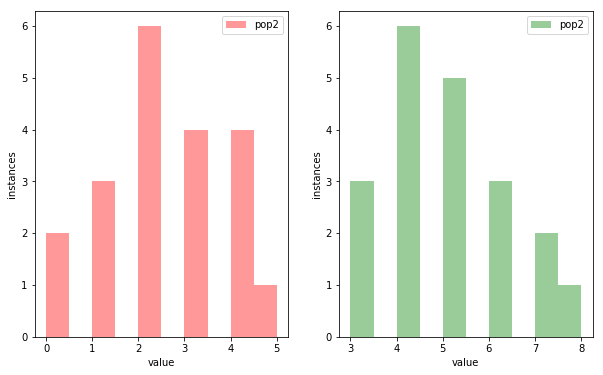

In [24]:
fig2=plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
plt.hist(sampn20_frpop1, color='r', alpha=.4, label='pop2')
plt.ylabel('instances')
plt.xlabel('value')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.hist(sampn20_frpop2, color='g', alpha=.4, label='pop2')
plt.legend(loc='upper right')
plt.ylabel('instances')
plt.xlabel('value')
plt.show(fig2)

In [16]:
print('mean for second sample of pop1 is {} and mean for first sample of pop2 is {}'.format(sampn20_frpop1.mean(), sampn20_frpop2.mean()))
print('standard deviation for second sample of pop1 is {} and standard deviation for second sample of pop2 is {}'.format(sampn20_frpop1.std(), sampn20_frpop2.std()))

mean for second sample of pop1 is 2.4 and mean for first sample of pop2 is 4.35
standard deviation for second sample of pop1 is 1.42828568570857 and standard deviation for second sample of pop2 is 1.0618380290797649


Note: The standard deviation are smaller than I was expecting compared to the last sample. 

#### Q. 2 Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

In [25]:
pop1_q2a = np.random.binomial(10, .3, 10000)
pop2_q2a = np.random.binomial(10, .5, 10000)


In [26]:
sampn1000_frpop1_q2a = np.random.choice(pop1_q2a, 1000)
sampn1000_frpop2_q2a = np.random.choice(pop2_q2a, 1000)


In [28]:
test_value = ttest_ind(sampn1000_frpop1_q2a, sampn1000_frpop2_q2a, equal_var=False)

In [31]:
test_value[1]

1.2827399562260494e-162

In [43]:
pop1_q2b = np.random.binomial(10, .4, 10000)
pop2_q2b = np.random.binomial(10, .5, 10000)


In [44]:
sampn1000_frpop1_q2b = np.random.choice(pop1_q2b, 1000)
sampn1000_frpop2_q2b = np.random.choice(pop2_q2b, 1000)


In [46]:
ttest_ind(sampn1000_frpop1_q2b, sampn1000_frpop2_q2b, equal_var=False)

Ttest_indResult(statistic=-14.524280486533687, pvalue=1.636275215816168e-45)

A: The t-statistic become much smaller. For the second set of populations, the means were much closer so there was more overlap in between the distribution. The new value's absolute value is much smaller, but still of a good size. Similarly, the absolute value of the p-value became much smaller, though still very significant.

## Issue 2
__note: 3. Using variable names in braces in the print statement... If you only want one of the two values a function returns?__ 

As per the cell above, ttest_ind returns two values, but how do i only print statistic? cell below has what I tried.

In [41]:
statistic_value= ttest_ind(sampn1000_frpop1_q2a, sampn1000_frpop2_q2a, equal_var=False)
print(statistic_value)

Ttest_indResult(statistic=-29.91690729062344, pvalue=1.2827399562260494e-162)


In [39]:
statistic_value= ttest_ind(sampn1000_frpop1_q2a, sampn1000_frpop2_q2a, equal_var=False).pvalue
print(statistic_value)

1.2827399562260494e-162


In [40]:
print('the t value is {statistic_value}'.format(ttest_ind(sampn1000_frpop1_q2a, sampn1000_frpop2_q2a, equal_var=False)))

KeyError: 'statistic_value'

#### Q3. Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

In [24]:
pop1_q3 = np.random.exponential(2, 10000)
pop2_q3 = np.random.exponential(4.5, 10000)

In [25]:
sampn1000_frpop1_q3 = np.random.choice(pop1_q3, 1000)
sampn1000_frpop2_q3 = np.random.choice(pop2_q3, 1000)

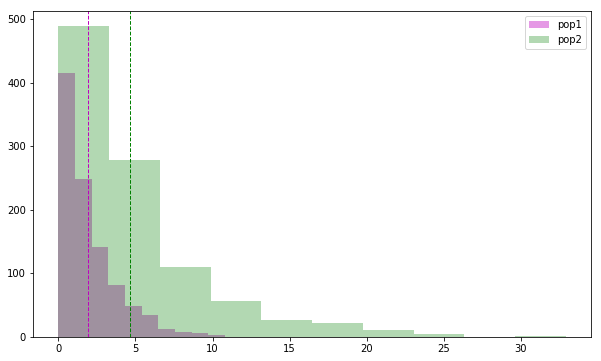

In [26]:
plt.figure(figsize=(10,6))
plt.hist(sampn1000_frpop1_q3, alpha=.4, color='m', label='pop1')

plt.hist(sampn1000_frpop2_q3, alpha=.3, color='g', label='pop2')
plt.legend(loc='upper right')
plt.axvline(sampn1000_frpop1_q3.mean(), color='m', linestyle='dashed', linewidth=1)
plt.axvline(sampn1000_frpop2_q3.mean(), color='g', linestyle='dashed', linewidth=1)

plt.show()

A: I think the sample means do represent the population values, but in a different way since the distribution is different; they are not indentical but can be used for comparing the populations. 